In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
dataset = pd.read_csv(r"C:\Users\Gray\Desktop\100_Days_ML_CODE\Linear Regression\test_8i3B3FC.csv")
dataset.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [27]:
dataset = pd.read_csv(r"C:\Users\Gray\Desktop\100_Days_ML_CODE\Linear Regression\test_8i3B3FC.csv", sep=',')
dataset.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [28]:
print(dataset)

            ID Tag  Reputation  Answers  Username    Views
0       366953   a      5645.0      3.0     50652  33200.0
1        71864   c     24511.0      6.0     37685   2730.0
2       141692   i       927.0      1.0    135293  21167.0
3       316833   i        21.0      6.0    166998  18528.0
4       440445   i      4475.0     10.0     53504  57240.0
...        ...  ..         ...      ...       ...      ...
141443   47187   j      4681.0      4.0    152060   2469.0
141444  329126   j      7782.0      3.0     89235  18998.0
141445  282334   p       435.0      5.0    119788  57048.0
141446  386629   o       176.0      3.0     86824  10193.0
141447  107271   a       648.0      2.0    102240  12785.0

[141448 rows x 6 columns]


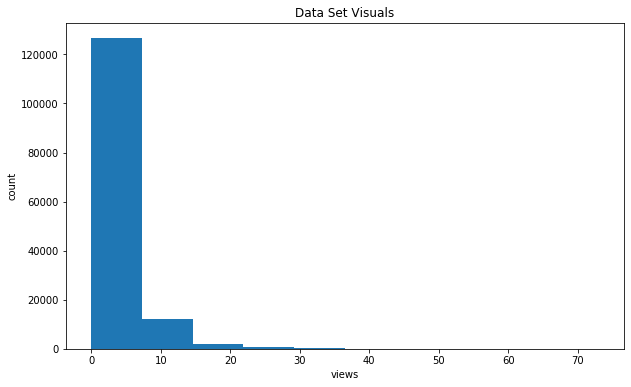

In [29]:
#basic visulization
plt.figure(figsize=(10, 6))
plt.hist(dataset.Answers)
plt.title('Data Set Visuals')
plt.xlabel('views')
plt.ylabel('count')
plt.show()

In [30]:
#assumption Username, ID does not affect the number of upvotes

Y = dataset.Answers
X = dataset.iloc[:,[2,5]]

print(X)

        Reputation    Views
0           5645.0  33200.0
1          24511.0   2730.0
2            927.0  21167.0
3             21.0  18528.0
4           4475.0  57240.0
...            ...      ...
141443      4681.0   2469.0
141444      7782.0  18998.0
141445       435.0  57048.0
141446       176.0  10193.0
141447       648.0  12785.0

[141448 rows x 2 columns]


In [31]:
W = np.zeros((X.shape[1]+1,1))
print(W)

[[0.]
 [0.]
 [0.]]


In [32]:
#Normaliztaion
def normalize(x, mode='std'):
    N = x.shape[0]
    
    x_mean = np.mean(x, axis=0)
    if mode=='std':
        x_std = np.std(x, axis=0)
    else:
        x_std = np.max(x, axis =0)
    
    x = (x-x_mean)/x_std
    
    arr = np.ones((N, 1))
    x = np.hstack((arr, x))
    #print(x)
    return x

In [33]:
#testing normalization 
np.random.seed(0)
x = np.random.rand(5,5)
x = normalize(x, mode='std')
print(x.shape)
print(x)

(5, 6)
[[ 1.         -0.20602098  0.78951027 -0.41884901 -1.72218407  0.17681922]
 [ 1.          0.11854592 -0.22998031  1.34645231  1.12080062  0.03565705]
 [ 1.          0.6060984   0.10534616 -0.6309152   0.86237971 -1.06099139]
 [ 1.         -1.74955693 -1.76276226  0.98513859 -0.13855101  1.74368392]
 [ 1.          1.23093358  1.09788614 -1.28182669 -0.12244524 -0.8951688 ]]


In [34]:
# now comes cost calculation method
def cal_cost(x,y,w):
    
    n = x.shape[0]
    y_hat = np.dot(x, w)
    cost = np.sum((y_hat-y)**2)/(2*n)
    return cost

In [35]:
np.random.seed(0)
x_test = np.random.rand(5,5)
y_test = np.random.rand(5,1)
w_test = np.random.rand(6,1)

x_test = normalize(x_test)
cost = cal_cost(x_test, y_test, w_test)
print(cost)

0.2911040132454302


In [36]:
#time for the gradient descent

def gradient(x, y, w, iterations, learning_rate):
    n = x.shape[0]
    j = []
    initial_cost = cal_cost(x, y, w)
    j.append(initial_cost)
    
    for i in range (iterations):
        y_hat = np.dot(x, w)
        print(i)
        w = w - ((learning_rate/(2*n))*(np.dot(x.T, (y_hat-y))))
        
        cost = cal_cost(x, y, w)
        j.append(cost)
        
    return (w, j)
    

In [37]:
np.random.seed(0)
x_test = np.random.rand(5,5)
y_test = np.random.rand(5,1)
w_test = np.random.rand(6,1)
x_test = normalize(x_test)

w_test, j_test = gradient(x_test, y_test, w_test, 1000, 0.001)
print("Initial cost==> {}".format(j_test[0]))
print("Final cost==> {}".format(j_test[-1]))
print("Weights after updation==> {}".format(w_test))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [38]:
print(X)
X = normalize(X)
Y = np.expand_dims(Y, axis=1)
W, J = gradient(X, Y, W, 1000, 0.001)


        Reputation    Views
0           5645.0  33200.0
1          24511.0   2730.0
2            927.0  21167.0
3             21.0  18528.0
4           4475.0  57240.0
...            ...      ...
141443      4681.0   2469.0
141444      7782.0  18998.0
141445       435.0  57048.0
141446       176.0  10193.0
141447       648.0  12785.0

[141448 rows x 2 columns]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186

Text(0.5, 1.0, 'convergence graph of cost function')

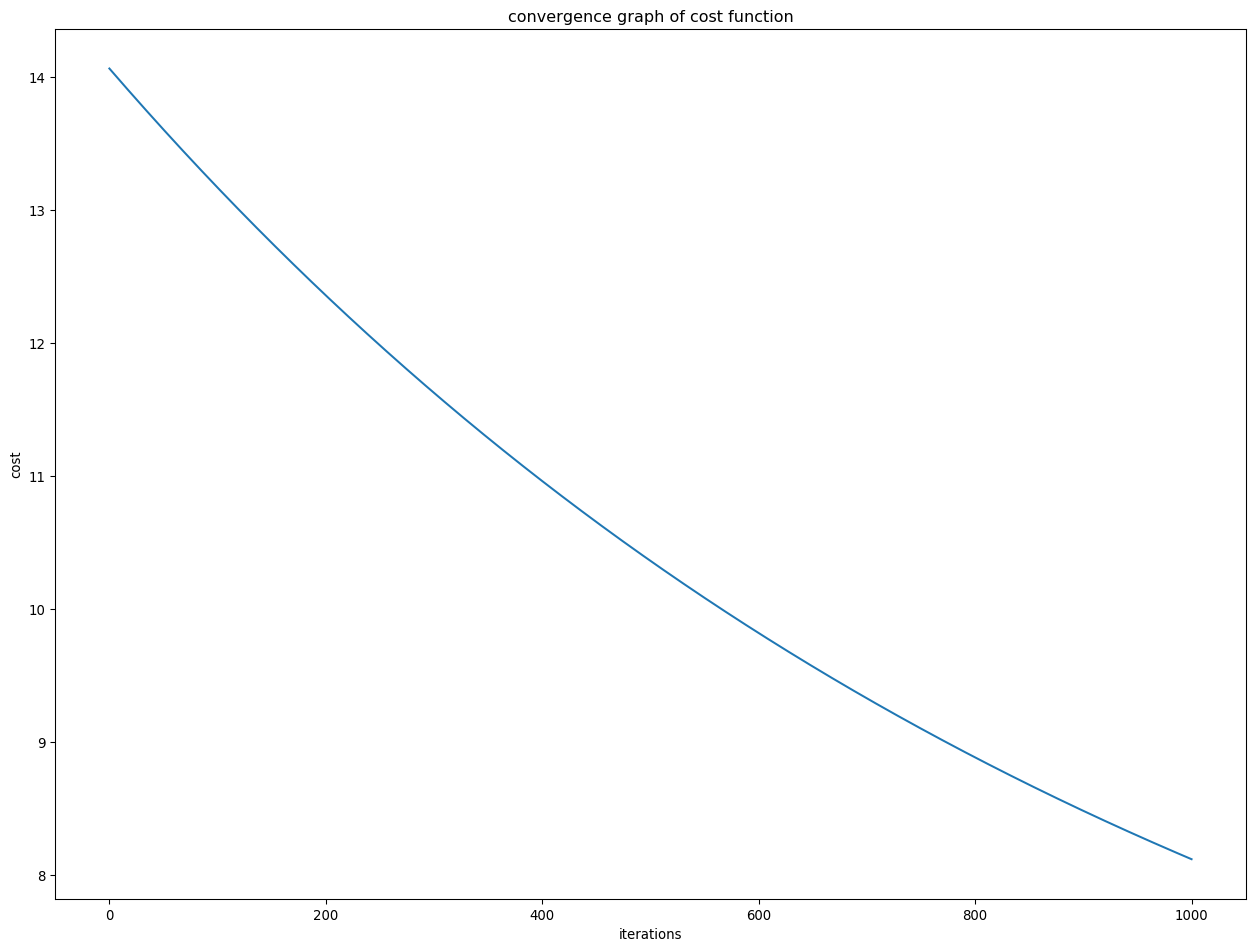

In [39]:
t = np.arange(1000 + 1)

plt.figure(figsize = (16,12),dpi = 96)
plt.plot(t,J)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('convergence graph of cost function')

In [40]:
print('Initial cost = {}'.format(J[0]))
print('final cost = {}'.format(J[-1]))

Initial cost = 14.06218186188564
final cost = 8.119111788471745


In [41]:
def score(x,y,w):
    x = normalize(x)
    y = np.expand_dims(y,axis = 1)
    
    y_hat = np.dot(x,w)
    score = 1.0 - ((np.sum((y - y_hat)**2))/(np.sum((y - np.mean(y))**2)))
    return score

In [42]:
dataset1 = pd.read_csv(r"C:\Users\Gray\Desktop\100_Days_ML_CODE\Linear Regression\train_NIR5Yl1.csv")

Y_test = dataset1.Answers
X_test = dataset1.iloc[:,[2,5]]
W = np.zeros((X_test.shape[1]+1,1))

s = score(X_test,Y_test,W)
print('score of the system is : {}'.format(s))

score of the system is : -1.1978684988387314
